# Constrain dark matter fraction that asteroid-mass PBHs could compose

This tutorial walks the user through computing constraints on the fraction of dark matter that asteroid-mass PBHs could compose using O4a all-sky search for CWs upper limits.

The user may input their own mass function or suppression factor and use the model-independent rate densities to calculate constraints on their own PBH models.

## Import necessary packages

In [27]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import cmasher as cmr
choice_cmap='magma'
import matplotlib.ticker as mticker
import os
import sys
import cw_constrain
from cw_constrain.PBH_constrain.pbh_constrain import *
# sys.path.append('/Users/andrewmiller/Desktop/O4/cw_constrain/')
# from cw_constrain.PBH_constrain.pbh_constrain import pbh_get_constraints
# savedir = '/Users/andrewmiller/Desktop/O4/O4a_CW_allsky_isolated/figures/'

## Choose $m_1$ values to consider, the search limits you wish to use, and the observing run

In [28]:
m1s = [1e-3,1e-2,1e-1,2.5]
labels = [r'$10^{-3}$',r'$10^{-2}$',r'$10^{-1}$','2.5']
run='O3' ##replace with O4a when results become public
search = 'FH'

## How to compute the upper limit on $\tilde{f}$

We have considered the prescriptions in Raidal et al. (2018) arXiv:1812.01930 and Hutsi et al. (2021) arXiv:2012.02786 , re-presented in Miller et al. (2022) arXiv:2110.06188, in which

\begin{equation}
\mathcal{R} = 5.28 \times 10^{-7}\, \mathrm{kpc}^{-3} \mathrm{yr}^{-1} \left(\frac{m_1}{M_\odot}\right)^{-32/37} \left(\frac{m_2}{m_1}\right)^{-34/37} \tilde{f}^{53/37}
\end{equation}

where 

\begin{equation}
\tilde f^{53/37} \equiv f_{\rm sup} f(m_1) f(m_2) f_{\rm PBH}^{53/37}
\end{equation}

Here, $f_{\rm sup}$ is the suppression factor that tells us to what extent binaries in the early universe were broken apart by nearby objects, $f(m)$ are the mass functions for $m_1$ and $m_2$, and $f_{\rm PBH}$ is the infamous fraction of dark matter that PBHs could compose. 

The mass functions are normalized such that $\int f(m) {\rm d} \ln m = 1$. $f_{\rm sup}=1$ for zero rate suppression (and gives the strongest constraint on $f_{\rm PBH}$.)

The model-independent output of continuous-wave searches is $\mathcal{R}_{95\%}$. We equate $\mathcal{R}_{95\%}=\mathcal{R}$ and solve for $\tilde{f}$ as a function of $m_1$,$m_2$.


## Compute constraint on $\tilde{f}$ and plot for equal- and asymmetric mass-ratio cases

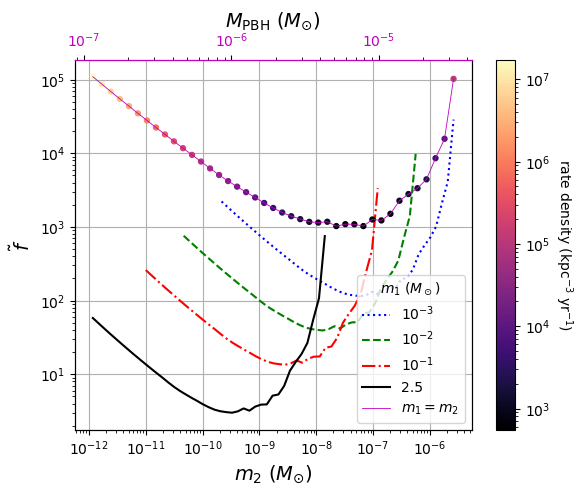

In [29]:


colors = ['b','g','r','k']
linesty = ['dotted','--','-.','-']



fig, ax = plt.subplots()
ax.grid(True)

for i in range(len(m1s)):
    rate_density,Mcs,ftilde_equal,ftilde_asymm,m2=pbh_get_constraints(m1s[i],run,search)

    ax.loglog(m2.T,ftilde_asymm.T,color=colors[i],label=labels[i],linestyle=linesty[i])

    
# Create separate y-axis for equal-mass case    
ax_top = ax.twiny()
ax_top.loglog(2**(1/5)*Mcs,ftilde_equal.transpose(),'m-',label=r'$m_1=m_2$',linewidth=0.6)

# Do this so that the rate density can appear as color for the equal-mass case
sc=ax_top.scatter(2**(1/5)*Mcs,ftilde_equal.transpose(),c=(rate_density.transpose()),cmap=choice_cmap,norm=mpl.colors.LogNorm(),marker='.',s=50)
ax_top.set_xscale('log')
cbar = fig.colorbar(sc, ax=ax)

# Labelling and coloring
cbar.set_label(label=r'rate density (kpc$^{-3}$ yr$^{-1}$)',rotation=270, labelpad=18)
ax_top.set_xlabel(r'$M_{\rm PBH}$ ($M_{\odot}$)',size=14)
ax.set_xlabel(r'$m_2$ ($M_{\odot}$)',size=14)
ax.set_ylabel(r'$\tilde{f}$',size=14)
ax_top.set_xlabel(r'$M_{\rm PBH}$ ($M_{\odot}$)',size=14)
ax_top.tick_params(axis='x', labelcolor='m')
ax_top.spines['top'].set_color('m')

# Get legend handles and labels from both axes
handles_ax, labels_ax = ax.get_legend_handles_labels()
handles_top, labels_top = ax_top.get_legend_handles_labels()

# Combine them
combined_handles = handles_ax + handles_top
combined_labels = labels_ax + labels_top

# Create one legend on ax (or ax_top, whichever you prefer)
ax.legend(combined_handles, combined_labels, title=r'$m_1$ ($M_\odot$)', loc='lower right')

# fig.savefig(savedir+'ftilde_vs_m2_diff_m1s_and_equal.pdf',format='pdf', bbox_inches='tight')


Above, the colorbar shows the model-independent rate density and refers to the circular points joined by the magneta line. That magenta line only refers to the top, magenta x-axis.

The different colored curves correspond to different choices of $m_1$, and these curves should be referred to the bottom x-axis only. 

For equal mass and asymmetric mass-ratio cases, the input rate densties to constrain $\tilde{f}$ are the same.

# Use the rate density upper limits to constrain your own PBH function

### Specify the value of $m_1$, the run and the search whose upper limits you wish to use

In [30]:
m1 = 2.5
run='O3' #change to O4a when reults become public
search = 'FH'
lin_flag = 1

### Compute the model-independent rate density upper limit as a function of chirp mass

In [31]:
Mcs = np.logspace(-7, -4, 50)
rate_density,_,ftilde_equal,ftilde_asymm,m2=pbh_get_constraints(m1,run,search,lin_flag,Mcs)

The above code outputs a PBH-model-independent rate density $=\mathcal{R}_{95\%}$, which can be used directly to constrain any PBH model that relates a rate density to $f_{\rm PBH}$. Basically

\begin{equation}
\mathcal{R}_{95\%} = \mathcal{R}\propto f_{\rm sup}f(m_1)f(m_2)f_{\rm PBH}F(m_1,m_2)
\end{equation}

Thus, you can code up your own expression for $\mathcal{R}$, or, if you wish to use the prescriptions given above and change the mass functions for $m_1$ $m_2$, or the suppression factor $f_{\rm sup}$, you can directly use $\tilde{f}$. Two values are output for $\tilde{f}$ from the code: one assuming equal-mass objects, and one for asymmetric mass-ratio objects

In [32]:
def constrain_your_fpbh(rate_density, fm1, fm2,fsup):
    """
    User-implemented function to map your rate density to the effective parameter f_PBH.

    Parameters
    ----------
    rate_density : float or array-like
        The merger rate density [e.g., in kpc⁻³ yr⁻¹].

    fm1 : float
        The fraction of PBHs in the first mass bin (or mass distribution parameter).

    fm2 : float
        The fraction of PBHs in the second mass bin (or other relevant mass distribution parameter).
    
    fsup : float
        Suppression of binary formation parameter.

    Returns
    -------
    fpbh : float
        The effective PBH fraction corresponding to the given merger rate density and mass fractions.

    Notes
    -----
    You must define this function based on how your physical model links the observed or predicted 
    rate density to f_PBH. This varies depending on your assumptions (e.g., clustering, binaries 
    formed in the early universe, mass function, etc.).
    """
    raise NotImplementedError("You must implement this function based on your PBH model.")


In [26]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
